# **House Rocket - Análise**


## 1. Imports

In [237]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [238]:
def jupyter_settings():
    %matplotlib inline
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [12,6]
    plt.rcParams['font.size'] = 12
    pd.options.display.float_format = '{:,.2f}'.format
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    sns.set()
    sns.set_palette("Set3")

jupyter_settings()

## 2. Coleta dos Dados

In [239]:
#Carregando dataset a aprtir de arquivo csv
df = pd.read_csv('Data/kc_house_data.csv')
df.head()

id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000 221,900.00         3       1.00         1180      5650    1.00           0     0          3      7        1180              0      1955             0    98178 47.51 -122.26           1340        5650
1  6414100192  20141209T000000 538,000.00         3       2.25         2570      7242    2.00           0     0          3      7        2170            400      1951          1991    98125 47.72 -122.32           1690        7639
2  5631500400  20150225T000000 180,000.00         2       1.00          770     10000    1.00           0     0          3      6         770              0      1933             0    98028 47.74 -122.23           2720        8062
3  2487200875  20141209T000000 604,000.00         4       3.00         1960      5000    1.00           0     0          5      7        1050            910      1965             0    98136 47.52 -122.39           1360        5000
4  1954400510  20150218T000000 510,000.00         3       2.00         1680      8080    1.00           0     0          3      8        1680              0      1987             0    98074 47.62 -122.05           1800        7503

In [240]:
#Verificando número de registros, colunas e respectivos tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [241]:
#Verificando se há registros duplicadas 
len(df)-len(df.drop_duplicates())

0

In [242]:
#Verificando se há ids duplicadas 
len(df)-len(df.drop_duplicates(subset=['id']))

177

**Observações**
* Temos um total de 21613 registros, sem duplicidade
* Não há valores nulos nos registros
* Existem colunas que podem ser removidas (não existem descrições delas no dicionário do dataset)
* Existem colunas com tipo (dtype) incorreto
* Temos 177 ids duplicados

## 3. Limpeza de Dados

In [243]:
#Removendo colunas sem descrição no dicionário do dataset
df.drop(columns=['grade', 'sqft_living15', 'sqft_lot15'], inplace=True)

In [244]:
#Convertendo coluna date para o tipo date
df['date'] = pd.to_datetime(df['date']) 

In [245]:
#convertendo sqft_living, sqft_lot, sqft_above, sqft_basement de Pés Quadrados para Metros Quadrados
df['sqft_living'] = round(df['sqft_living']*0.0929,2)
df['sqft_lot'] = round(df['sqft_lot']*0.0929,2)
df['sqft_above'] = round(df['sqft_above']*0.0929,2)
df['sqft_basement'] = round(df['sqft_basement']*0.0929,2)

In [246]:
#Renomeando colunas sqft_living, sqft_lot, sqft_above, sqft_basement para m2_living, m2_lot, m2_above, m2_basement
new_columns = {
    'sqft_living' : 'm2_living',
    'sqft_lot' : 'm2_lot',
    'sqft_above' : 'm2_above',
    'sqft_basement' : 'm2_basement'
}
df.rename(columns=new_columns, inplace=True)

In [247]:
#Alterando variável bathrooms de float para int
df['bathrooms'] = df['bathrooms'].astype('int64')

In [248]:
#convertendo Waterfront para Categorical
df['waterfront'] = pd.Categorical(df['waterfront'])
df['waterfront'] = df['waterfront'].cat.rename_categories({0: 'no', 1: 'yes'})

In [249]:
#convertendo view para Categorical
df['view'] = pd.Categorical(df['view'])
df['view'] = df['view'].cat.rename_categories({0: 'no view', 1: 'fair', 2: 'average', 3: 'good', 4: 'excelent'})

In [250]:
#convertendo condition para Categorical
df['condition'] = pd.Categorical(df['condition'])
df['condition'] = df['condition'].cat.rename_categories({1: 'poor', 2: 'fair', 3: 'average', 4: 'good', 5: 'very good'})

In [251]:
#Removendo registros com ids duplicados e mantendo o registro mais recente
df = df.sort_values(by='date').drop_duplicates(subset=['id'], keep='last')

In [252]:
df.select_dtypes('category').describe().T

count unique      top   freq
waterfront  21436      2       no  21273
view        21436      5  no view  19320
condition   21436      5  average  13911

In [253]:
#Verificando comportamento das variáveis quantitativas
df.describe().T

count             mean              std          min              25%              50%              75%              max
id           21,436.00 4,580,765,328.18 2,876,589,633.67 1,000,102.00 2,123,700,078.75 3,904,921,185.00 7,308,675,062.50 9,900,000,190.00
price        21,436.00       541,649.96       367,314.93    75,000.00       324,866.00       450,000.00       645,000.00     7,700,000.00
bedrooms     21,436.00             3.37             0.93         0.00             3.00             3.00             4.00            33.00
bathrooms    21,436.00             1.75             0.73         0.00             1.00             2.00             2.00             8.00
m2_living    21,436.00           193.48            85.39        26.94           132.85           178.37           236.90         1,257.87
m2_lot       21,436.00         1,406.10         3,858.94        48.31           468.22           707.34           993.68       153,411.25
floors       21,436.00             1.50             0.54         1.00             1.00             1.50             2.00             3.50
m2_above     21,436.00           166.38            77.02        26.94           111.48           144.92           206.24           874.19
m2_basement  21,436.00            27.10            41.13         0.00             0.00             0.00            52.02           447.78
yr_built     21,436.00         1,971.10            29.39     1,900.00         1,952.00         1,975.00         1,997.00         2,015.00
yr_renovated 21,436.00            84.73           402.43         0.00             0.00             0.00             0.00         2,015.00
zipcode      21,436.00        98,077.86            53.47    98,001.00        98,033.00        98,065.00        98,117.00        98,199.00
lat          21,436.00            47.56             0.14        47.16            47.47            47.57            47.68            47.78
long         21,436.00          -122.21             0.14      -122.52          -122.33          -122.23          -122.12          -121.31

**Observação**
* Percebemos que a variavel bedrooms, que mostra o número de quartos na casa, tem registro com o valor 33. Vamos considerar que esse outlier foi um erro de digitação e o correto seria 3
* Todas as outras tem um comportamento "esperado"

In [254]:
#Alterando registro com 33 quartos para 3
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3

## 4. Exploração e Analise de Dados (EDA)

Explorando os dados de maneira Univariada e Bivariada

### 4.1. EDA **Variáveis Univariada**

#### 4.1.1 Variáveis **Quantitativas**

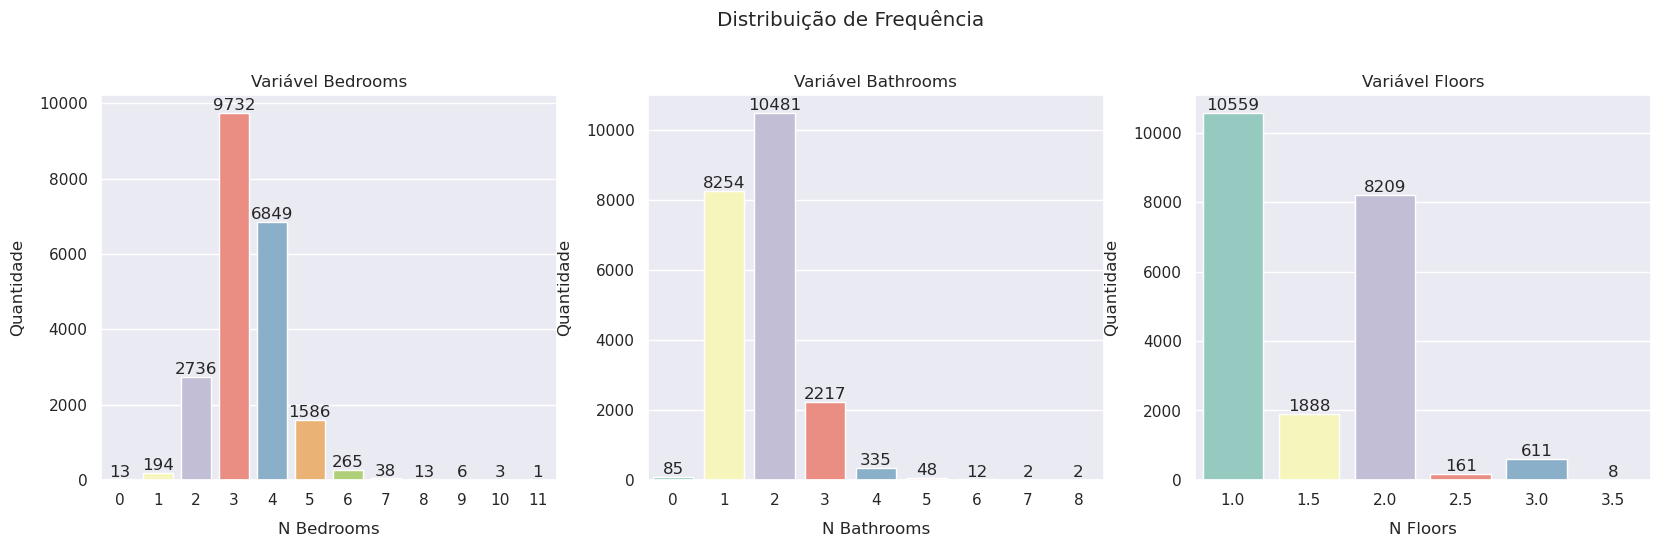

In [255]:
#Distribuição de Frequência das variáveis Quantitativas discretas
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Distribuição de Frequência', y=1.05)

#Plotando variável Bedrooms
ax[0].set_title('Variável Bedrooms')
gr = sns.countplot(ax=ax[0], x='bedrooms', data=df)
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('N Bedrooms', labelpad=10)
gr.set_ylabel('Quantidade', labelpad=10)

#Plotando variável Bathrooms
ax[1].set_title('Variável Bathrooms')
gr = sns.countplot(ax=ax[1], x='bathrooms', data=df)
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('N Bathrooms', labelpad=10)
gr.set_ylabel('Quantidade', labelpad=10)

#Plotando variável Floors
ax[2].set_title('Variável Floors')
gr = sns.countplot(ax=ax[2], x='floors', data=df)
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('N Floors', labelpad=10)
gr.set_ylabel('Quantidade', labelpad=10);


**Observações:**
* A maioria dos imóveis tem entre 2 e 5 quartos
* A maioria dos imóveis tem entre 1 e 3 banheiros
* A maioria dos imóveis tem de 1 a 2 pisos

Text(0, 0.5, 'Quantidade')

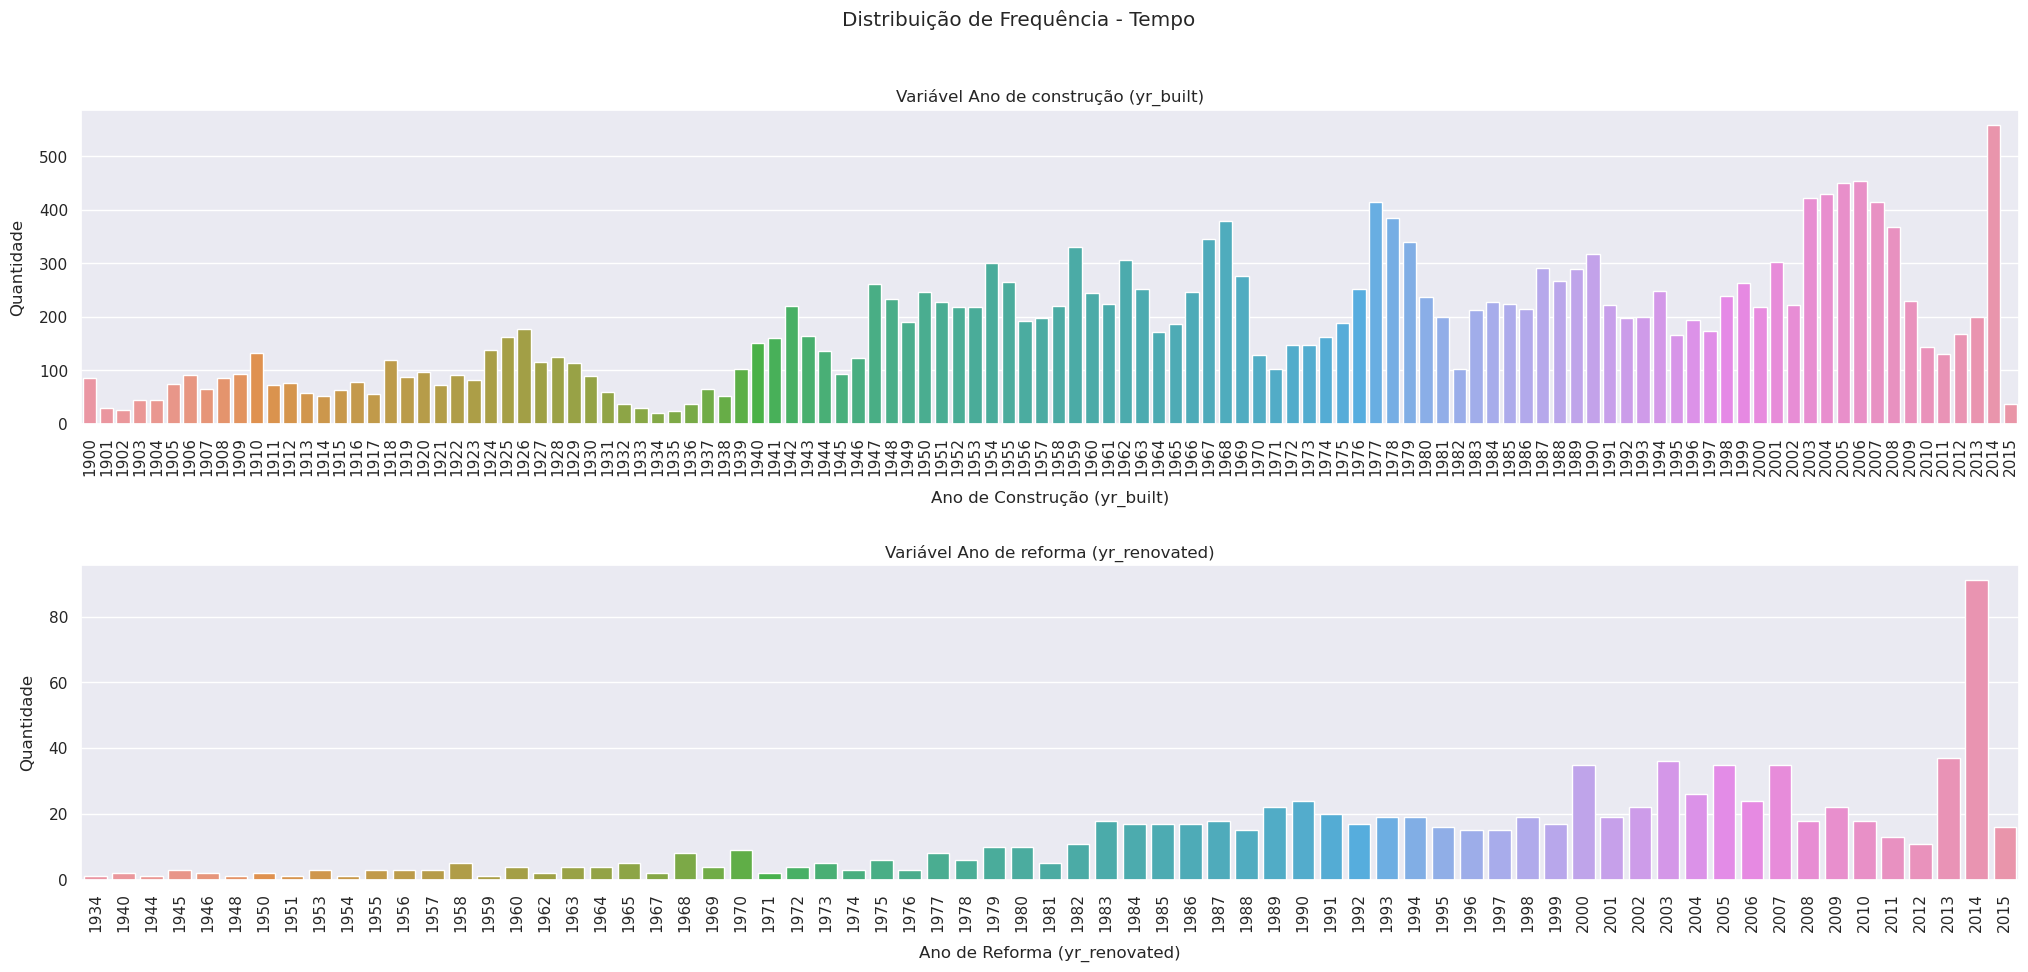

In [256]:
#Distribuição de Frequência das variáveis Quantitativas discretas - Date
fig, ax = plt.subplots(2, 1, figsize=(25, 10))
fig.suptitle('Distribuição de Frequência - Tempo')
plt.subplots_adjust(hspace=0.45)

#Plotando variável yr_built
ax[0].set_title('Variável Ano de construção (yr_built)')
gr = sns.countplot(ax=ax[0], x='yr_built', data=df)
ax[0].tick_params(axis='x', labelrotation=90)
gr.set_xlabel('Ano de Construção (yr_built)', labelpad=10)
gr.set_ylabel('Quantidade', labelpad=10)

#Plotando variável yr_renovated maior que 0 (removendo imóveis que não fizeram reforma)
ax[1].set_title('Variável Ano de reforma (yr_renovated)')
gr = sns.countplot(ax=ax[1], x='yr_renovated', data=df[df['yr_renovated'] > 0])
ax[1].tick_params(axis='x', labelrotation=90)
gr.set_xlabel('Ano de Reforma (yr_renovated)', labelpad=10)
gr.set_ylabel('Quantidade', labelpad=10)

In [257]:
total_imoveis = len(df)
total_reformado = len(df[df['yr_renovated'] > 0])
print(f"Dos {total_imoveis} imóveis, {total_reformado} foram reformados em algum momento ({round((total_reformado/total_imoveis)*100,2)}%)")

Dos 21436 imóveis, 910 foram reformados em algum momento (4.25%)


**Observações:**
* Apenas 4,23% dos imóveis da base foram reformados

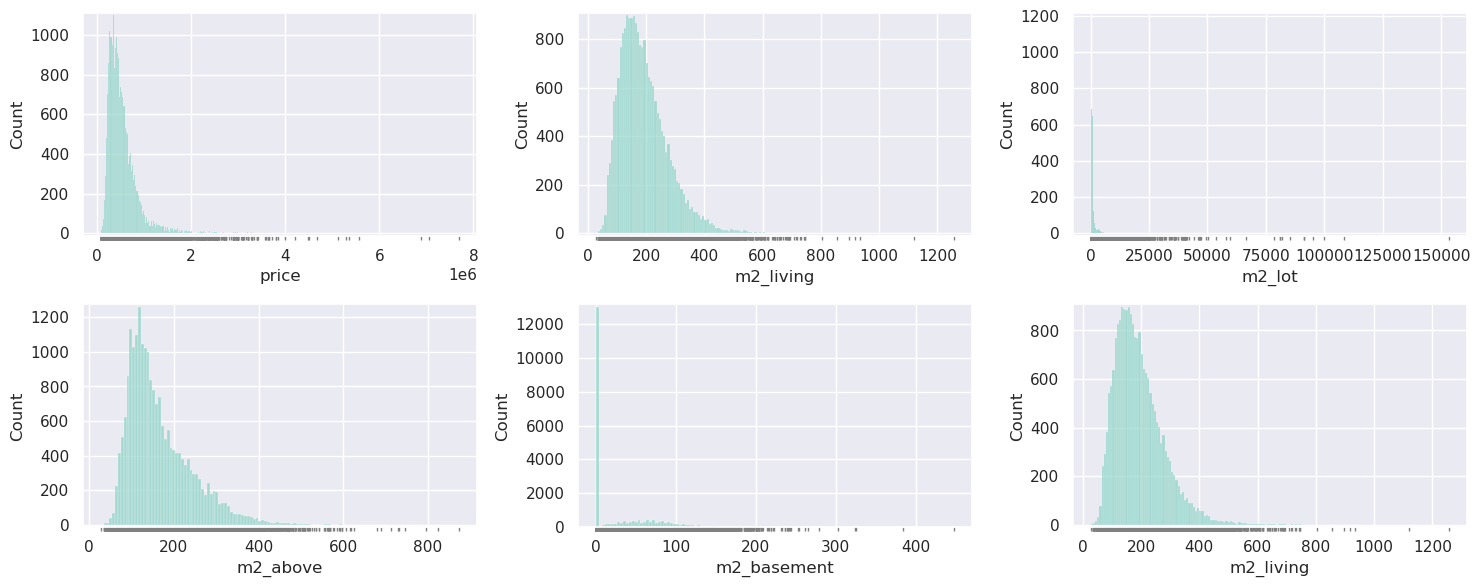

In [258]:
df_quant = df[['price', 'm2_living', 'm2_lot', 'm2_above', 'm2_basement', 'm2_living']]

fig = plt.figure(figsize=(15,6))

for i, col in enumerate(df_quant):
    ax = fig.add_subplot(2,3, i+1)
    sns.rugplot(x=df[col], ax=ax, height=-.02, clip_on=False, color='gray')
    gr = sns.histplot(x=df[col], ax=ax)

fig.tight_layout()  

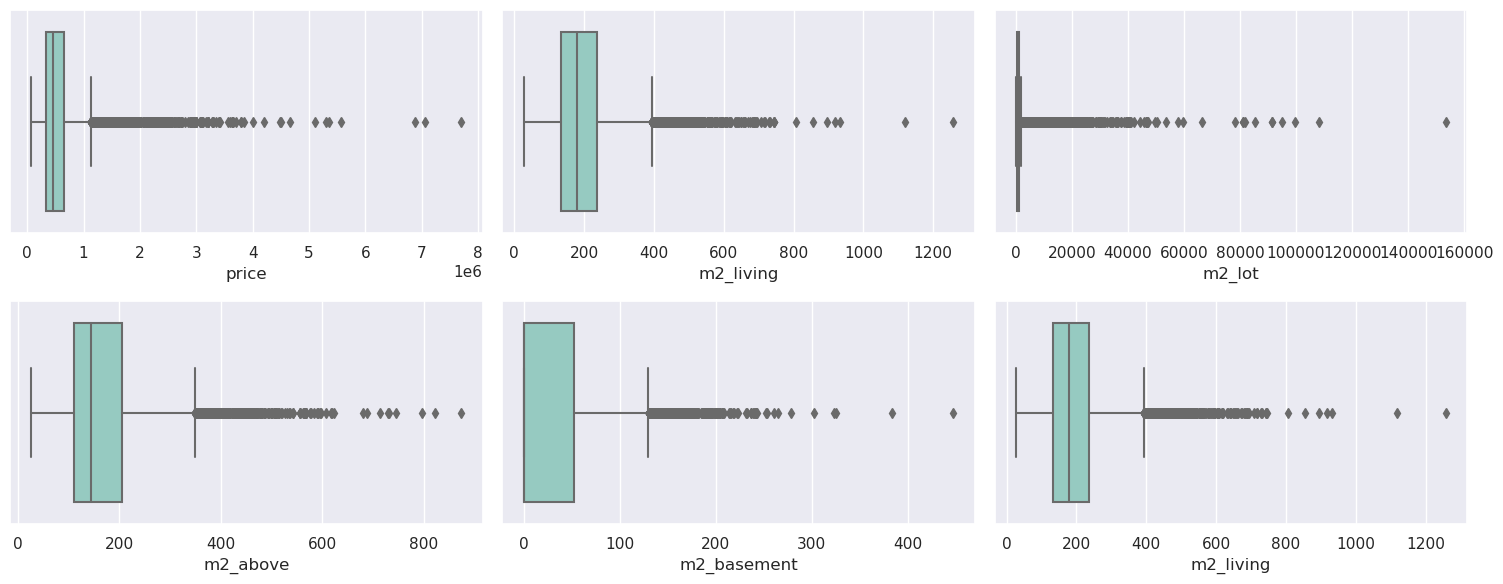

In [259]:
df_quant = df[['price', 'm2_living', 'm2_lot', 'm2_above', 'm2_basement', 'm2_living']]

fig = plt.figure(figsize=(15,6))

for i, col in enumerate(df_quant):
    ax = fig.add_subplot(2,3, i+1)
    gr = sns.boxplot(x=df[col], ax=ax)

fig.tight_layout()  

In [260]:
#Calculando Estatistica de Posição e Dispersão
est = df_quant.describe().T
est_disp = df_quant.agg([lambda x: x.max()-x.min(), np.std, lambda x: (x.std()/x.mean())*100, 'skew', 'kurt']).T
est_disp.columns = ['Amplitude', 'Desvio Padrão', 'Coef. Var.', 'Assimetria', 'Curtose']
pd.concat([est, est_disp], axis=1)

count       mean        std       min        25%        50%        75%          max    Amplitude  Desvio Padrão  Coef. Var.  Assimetria  Curtose
price       21,436.00 541,649.96 367,314.93 75,000.00 324,866.00 450,000.00 645,000.00 7,700,000.00 7,625,000.00     367,314.93       67.81        4.04    34.73
m2_living   21,436.00     193.48      85.39     26.94     132.85     178.37     236.90     1,257.87     1,230.93          85.39       44.13        1.47     5.25
m2_lot      21,436.00   1,406.10   3,858.94     48.31     468.22     707.34     993.68   153,411.25   153,362.94       3,858.94      274.44       13.04   284.08
m2_above    21,436.00     166.38      77.02     26.94     111.48     144.92     206.24       874.19       847.25          77.02       46.29        1.44     3.40
m2_basement 21,436.00      27.10      41.13      0.00       0.00       0.00      52.02       447.78       447.78          41.13      151.77        1.58     2.71
m2_living   21,436.00     193.48      85.39     26.94     132.85     178.37     236.90     1,257.87     1,230.93          85.39       44.13        1.47     5.25

**Observações:**
* A variável m2_basement tem muitos valores zeros (pelo menos metade dos valores)
* Todas as variáveis tem um desvio positivo (distribuição assimetria a direita)
* As variáveis m2_lot e m2_basement tem uma alta variação
* 75% dos valores dos imóveis são menores ou iguais a \$ 645.000
* 75% dos imóveis tem área igual ou menos a 236,9 M²
* o preço médio dos imóveis é de \$ 540.008,12 enquanto a mediana é \$ 450.000,00
    * Isso nos mostra que existem alguns imóveis com valores alto, que puxam a média para cima


#### 4.1.2 Variáveis Qualitativas

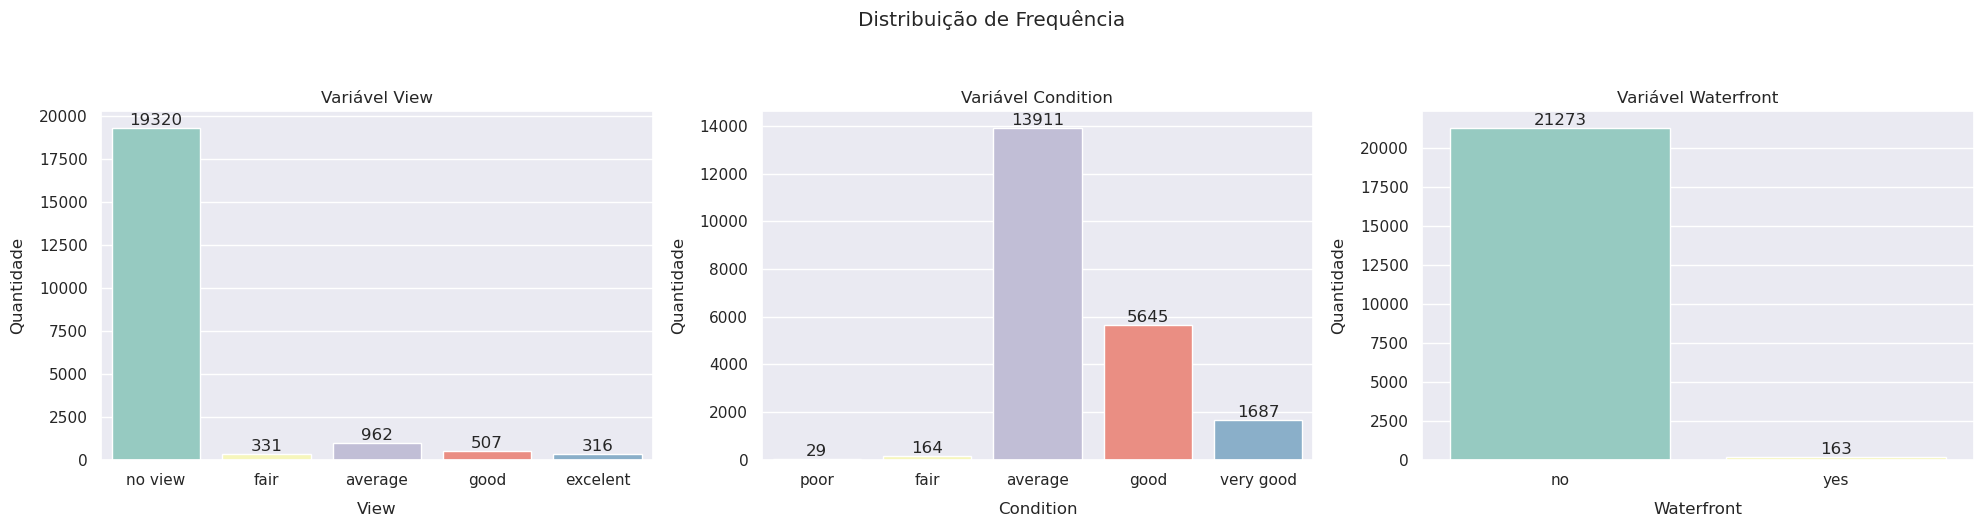

In [261]:
#Distribuição de Frequência das variáveis Qualitativas
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Distribuição de Frequência', y=1.05)

#Plotando variável Bedrooms
ax[0].set_title('Variável View')
gr = sns.countplot(ax=ax[0], x='view', data=df)
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('View', labelpad=10)
gr.set_ylabel('Quantidade', labelpad=10)

#Plotando variável Bathrooms
ax[1].set_title('Variável Condition')
gr = sns.countplot(ax=ax[1], x='condition', data=df)
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('Condition', labelpad=10)
gr.set_ylabel('Quantidade', labelpad=10)

#Plotando variável Floors
ax[2].set_title('Variável Waterfront')
gr = sns.countplot(ax=ax[2], x='waterfront', data=df)
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('Waterfront', labelpad=10)
gr.set_ylabel('Quantidade', labelpad=10);

fig.tight_layout()  


**Observações**

A maioria dos imóveis não tem vista, está em uma condição mediana e não tem vista para água

### 4.2. EDA **Variáveis Bivariadas**

#### 4.2.2 Qualitativas vs Qualitativas

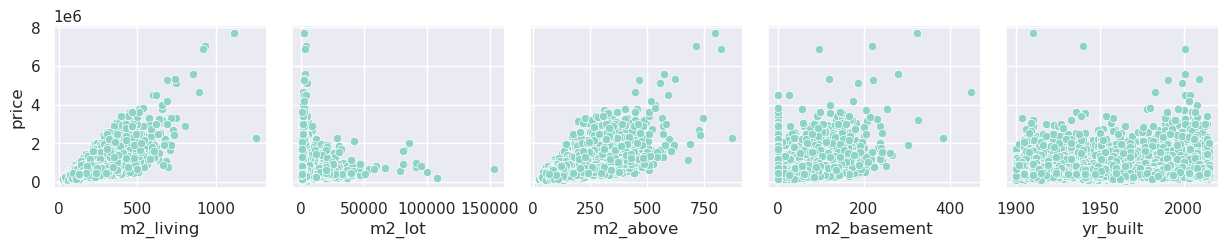

In [262]:
#verificando a relação de algumas variáveis com o preço
sns.pairplot(df, x_vars=['m2_living', 'm2_lot', 'm2_above', 'm2_basement', 'yr_built'], y_vars=['price'])

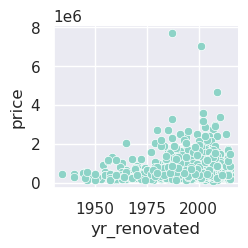

In [263]:
#verificando a relação da variável yr_renovated com o preço. Foi removido os anos = 0
sns.pairplot(df.query('yr_renovated > 0'), x_vars=['yr_renovated'], y_vars=['price'])

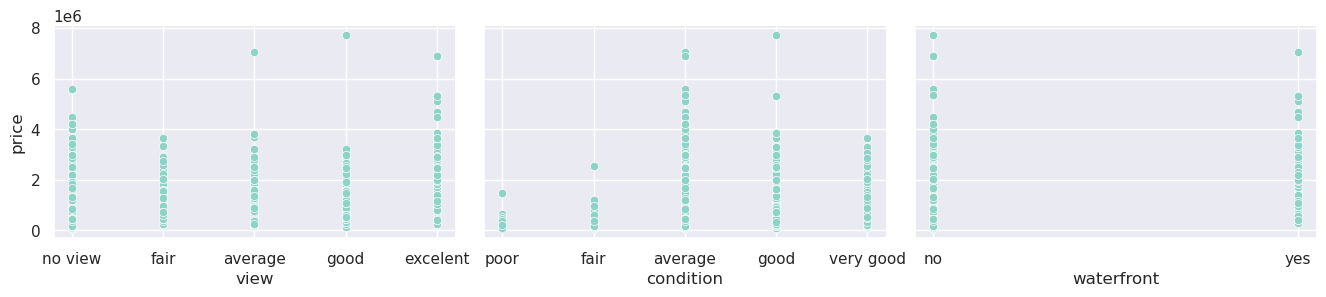

In [264]:
sns.pairplot(df, x_vars=['view', 'condition', 'waterfront'], y_vars=['price'], aspect=1.5, height=3)


<AxesSubplot:>

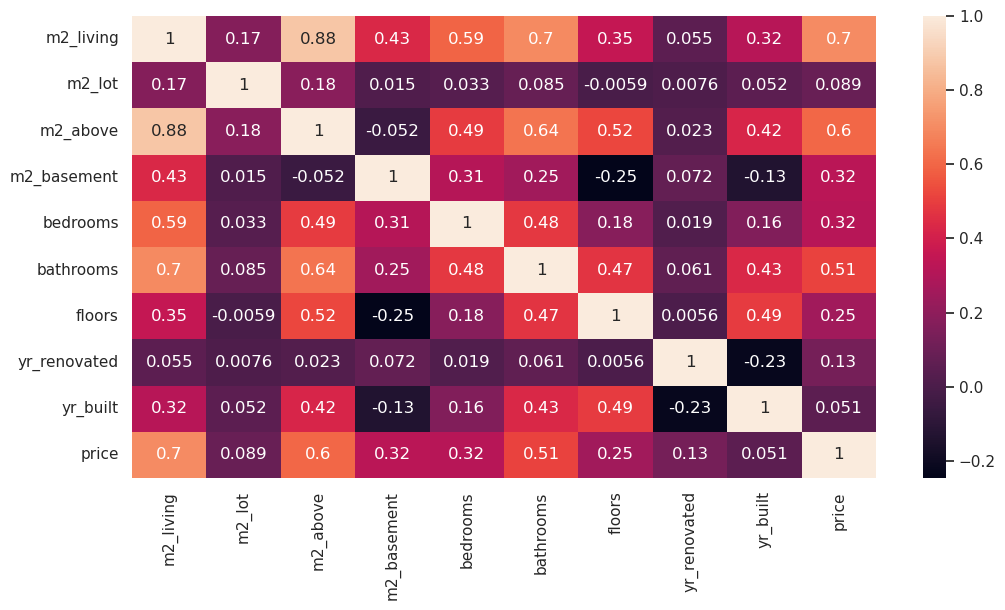

In [265]:
#verificando a correlação de algumas variáveis com o preço
sns.heatmap(df[['m2_living', 'm2_lot', 'm2_above', 'm2_basement', 'bedrooms', 'bathrooms', 'floors', 'yr_renovated', 'yr_built', 'price']].corr(), annot=True)

**Observações:**
* A variável m2_living (e m2_above) tem uma correlação positiva grande com o Preço do imóvel
* Há uma relação entre o número de banheiros e o preço.
    * Provavelmente isso acontece por, no geral, casas com mais banheiros terem mais M² (conseguimos ver essa relação forte existente entre essas variáveis)
* A qualidade da vista (view) também aparente ter uma correlação positiva com o preço do imóvel

#### 4.2.2 Qualitativas vs Qualitativas

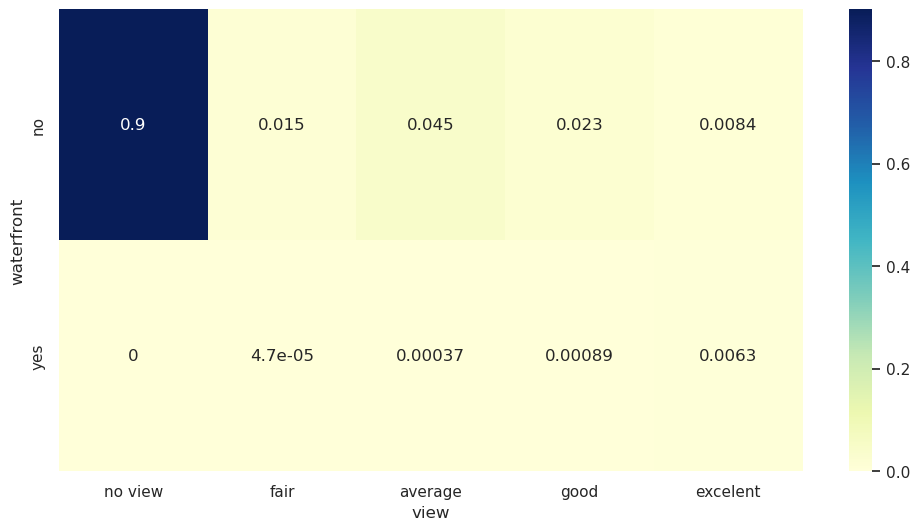

In [266]:
#Criando tabela de classificação cruzada para waterfront e view
crosstab = pd.crosstab(df['waterfront'], df['view'], normalize=True)
sns.heatmap(crosstab, annot=True, cmap="YlGnBu");


In [267]:
#Calculando Qui-quadrado para os pares view e waterfront
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f"Estatistica Qui²: {chi2}")
print(f"Graus de Liberdade: {dof}")
print(f"p-valor: {p}")

Estatistica Qui²: 0.3537090896959889
Graus de Liberdade: 4
p-valor: 0.986088368200217


Como p-valor > 0.05 não podemos rejeitar H0 (As variáveis (view e waterfront) são independentes)

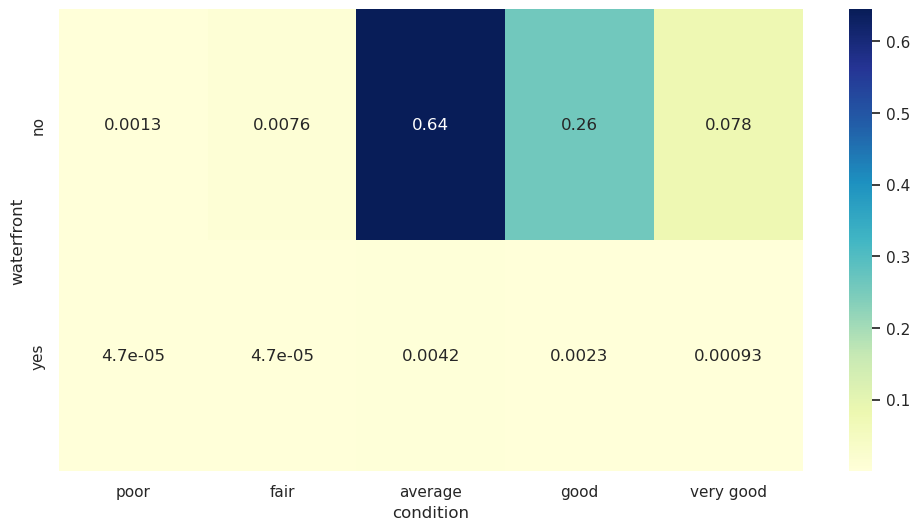

In [268]:
#Criando tabela de classificação cruzada para waterfront e view
crosstab = pd.crosstab(df['waterfront'], df['condition'], normalize=True)
sns.heatmap(crosstab, annot=True, cmap="YlGnBu");


In [269]:
#Calculando Qui-quadrado para os pares condition e waterfront
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f"Estatistica Qui²: {chi2}")
print(f"Graus de Liberdade: {dof}")
print(f"p-valor: {p}")

Estatistica Qui²: 0.00047220864026410357
Graus de Liberdade: 4
p-valor: 0.9999999721317618


Como p-valor > 0.05 não podemos rejeitar H0 (As variáveis, waterfront e condition, são independentes)

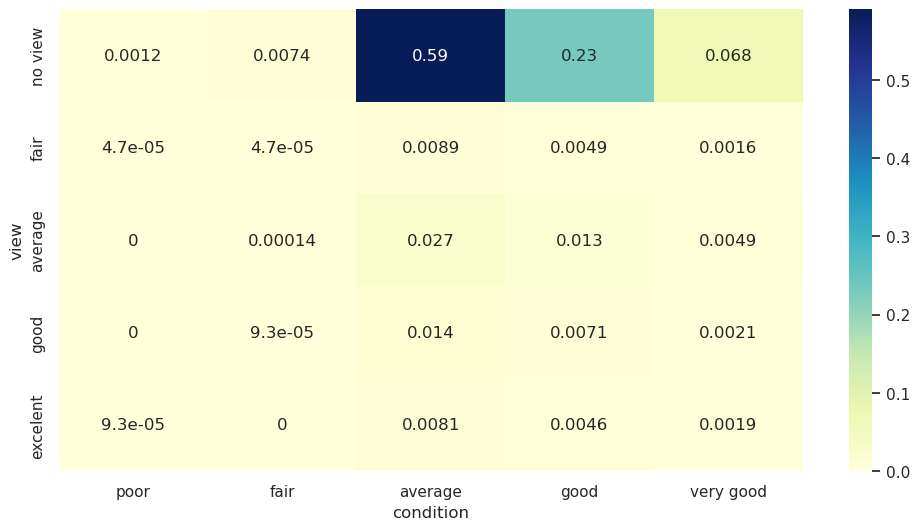

In [270]:
#Criando tabela de classificação cruzada para waterfront e view
crosstab = pd.crosstab(df['view'], df['condition'], normalize=True)
sns.heatmap(crosstab, annot=True, cmap="YlGnBu");


In [271]:
#Calculando Qui-quadrado para os pares view e condition
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print(f"Estatistica Qui²: {chi2}")
print(f"Graus de Liberdade: {dof}")
print(f"p-valor: {p}")

Estatistica Qui²: 0.003074012901039643
Graus de Liberdade: 16
p-valor: 1.0


Como p-valor > 0.05 não podemos rejeitar H0 (As variáveis, view e condition, são independentes)

**Observações**

Não existe uma relação estatisticamente significativa entre as variáveis categóricas, ou seja, o fato do imóvel estar de frente para água não interfere na classificação de vista ou condição, da mesma forma que a condição da casa não interfere na classificação da vista

#### 4.2.3 Quantitativas vs Qualitativas

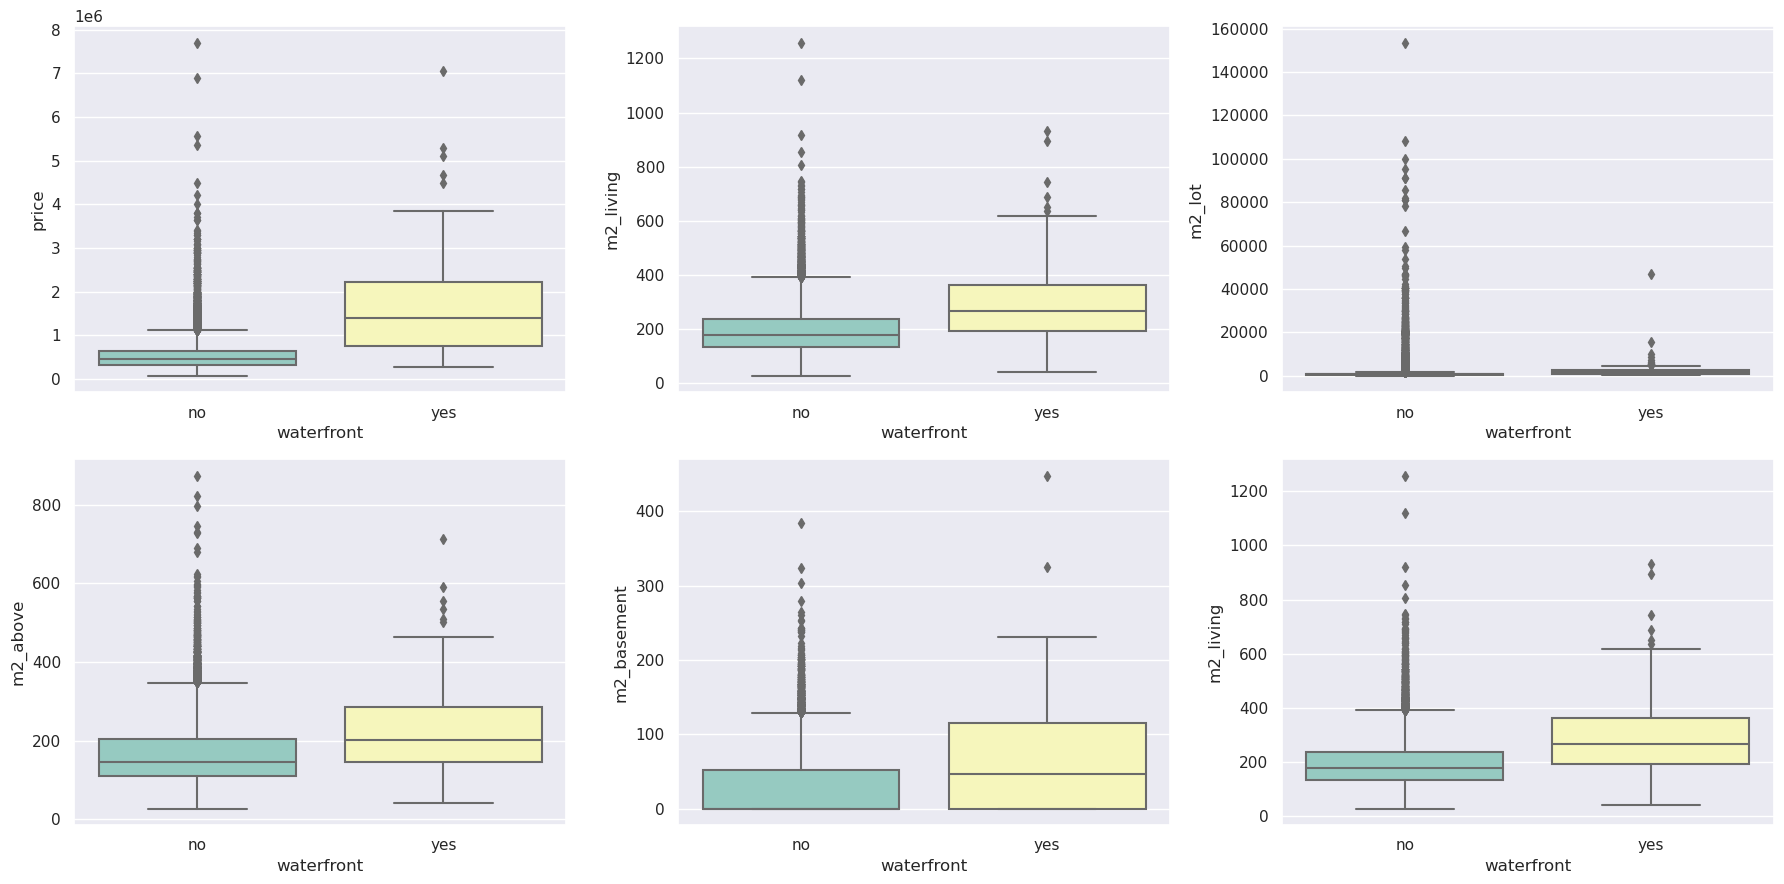

In [272]:
df_quant = df[['price', 'm2_living', 'm2_lot', 'm2_above', 'm2_basement', 'm2_living']]

fig = plt.figure(figsize=(18,9))

for i, col in enumerate(df_quant):
    ax = fig.add_subplot(2,3, i+1)
    gr = sns.boxplot(y=df[col], x=df['waterfront'], ax=ax)

fig.tight_layout()  

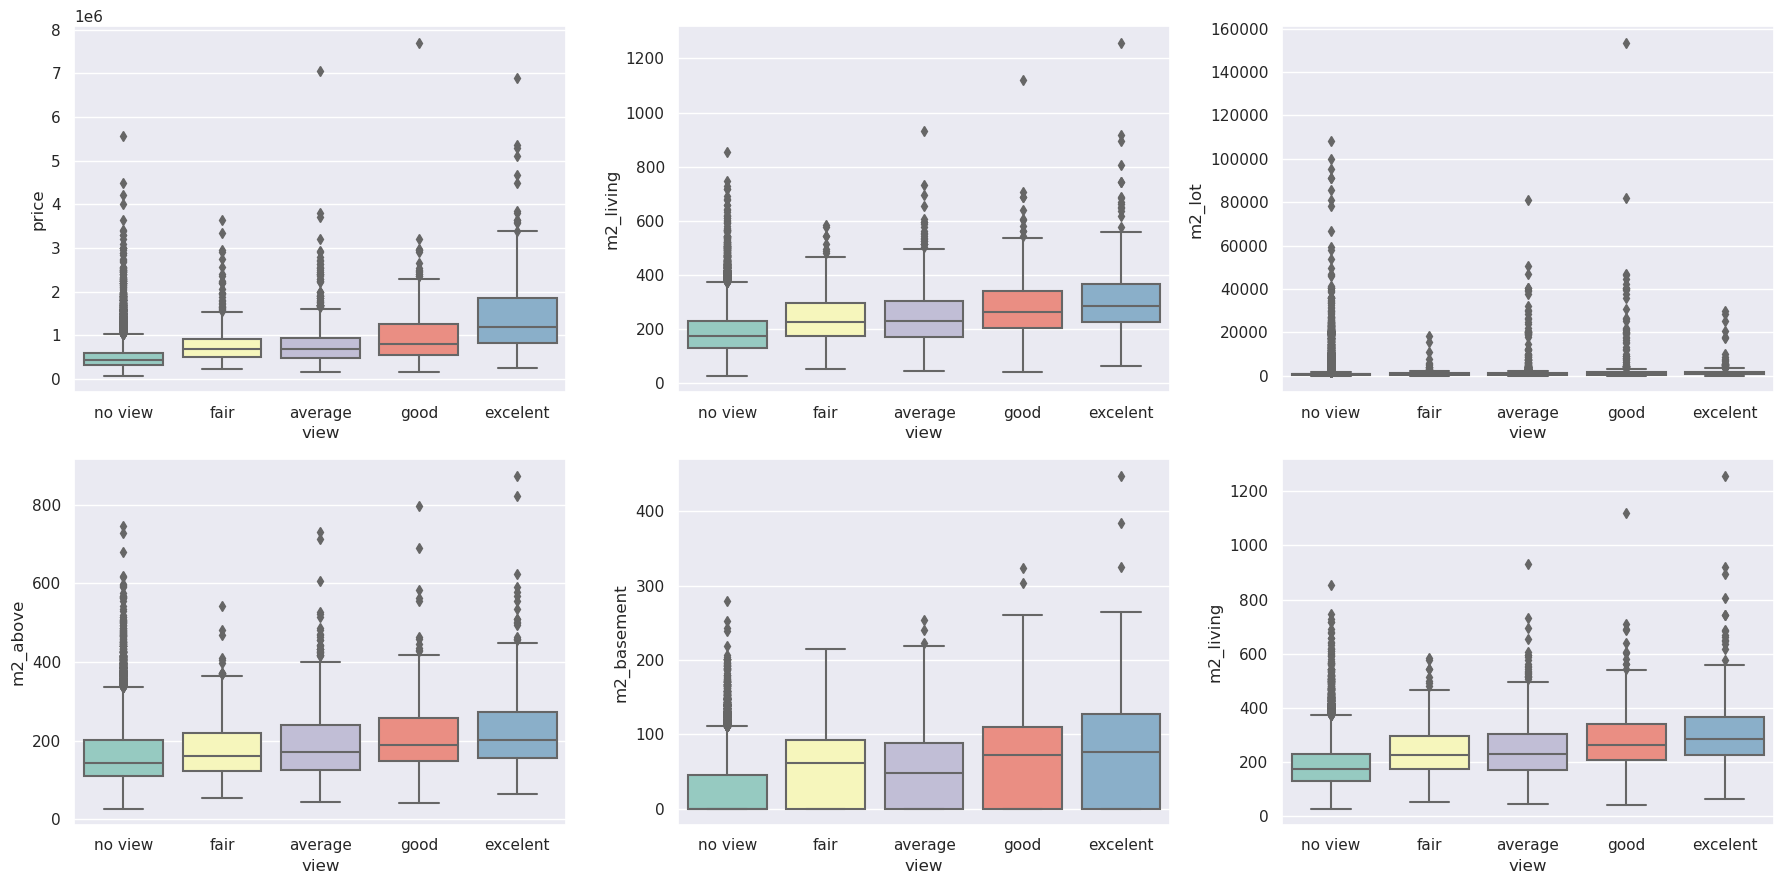

In [273]:
fig = plt.figure(figsize=(18,9))

for i, col in enumerate(df_quant):
    ax = fig.add_subplot(2,3, i+1)
    gr = sns.boxplot(y=df[col], x=df['view'], ax=ax)

fig.tight_layout()  

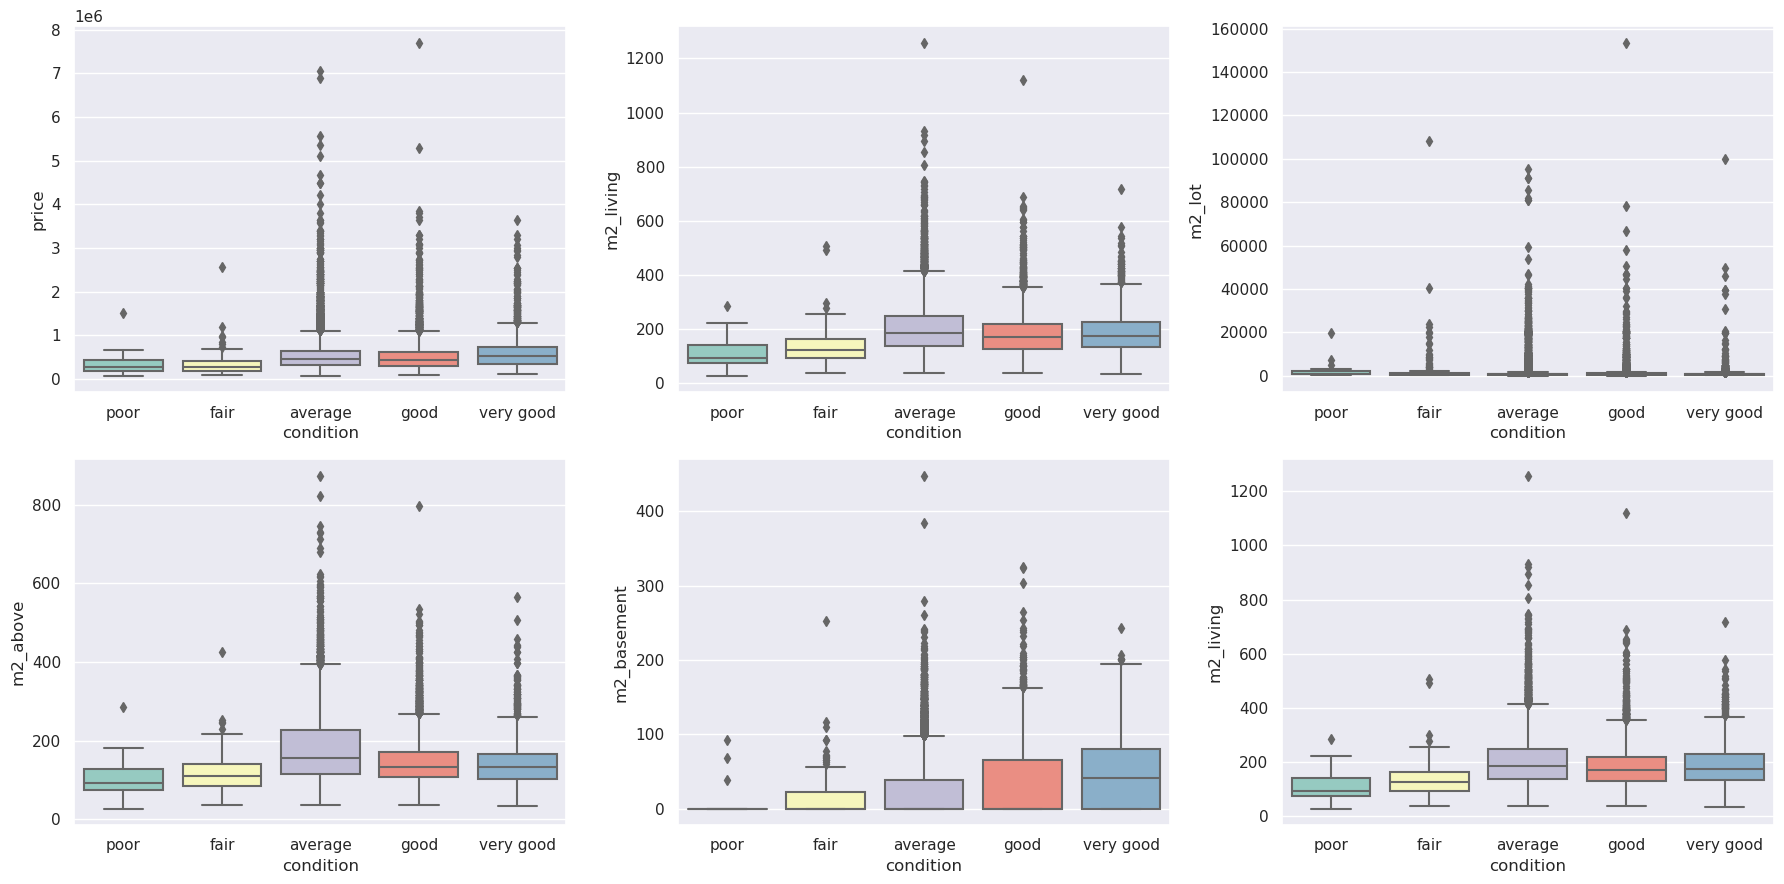

In [274]:
fig = plt.figure(figsize=(18,9))

for i, col in enumerate(df_quant):
    ax = fig.add_subplot(2,3, i+1)
    gr = sns.boxplot(y=df[col], x=df['condition'], ax=ax)

fig.tight_layout()  

In [275]:
#Correlação de Person para as variáveis categóricas e price
print(f"view x price: {df['view'].cat.codes.corr(df['price']).round(3)}")
print(f"condition x price: {df['condition'].cat.codes.corr(df['price']).round(3)}")
print(f"waterfront x price: {df['waterfront'].cat.codes.corr(df['price']).round(3)}")
print('---')
#Correlação de Person para as variáveis categóricas e m2_living
print(f"view x m2_living: {df['view'].cat.codes.corr(df['m2_living']).round(3)}")
print(f"waterfront x m2_living: {df['waterfront'].cat.codes.corr(df['m2_living']).round(3)}")

view x price: 0.397
condition x price: 0.035
waterfront x price: 0.267
---
view x m2_living: 0.284
waterfront x m2_living: 0.104


**Observações**

* A qualidade da vista e a localização do imóvel (de frente pra água ou não) parecem interferir no preço do imóvel
* Os imóveis de frente para água, na média, tem uma metragem maior

### 4.3. EDA **Mapa**

In [276]:
aux = df[['lat', 'long', 'price', 'm2_living']].copy()
aux = aux[aux['price'] <= aux['price'].quantile(0.95)]

fig = px.scatter_mapbox( aux, 
                         lat="lat", 
                         lon="long", 
                         color='price',
                         color_continuous_scale='portland', 
                         size_max=15, 
                         zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## 5. Validando Hipóteses

**Hipótese 1:** Imóveis que possuem vista para água, são 30% mais caros, na média.

**Hipótese 2:** Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

**Hipótese 3:** Há sempre um crescimento do preço dos imóveis MoM (Month over Month) de 10%

**Hipótese 4:** Apartamentos reformados são 10% mais caros, na média

**Hipótese 5:** Apartamentos com uma vista excelente são 30% mais caros, na média

**Hipótese 6:** Quanto mais pro passado olhamos em relação a data de construção maior a proporção de imóveis reformados

### **Hipótese 1**
Imóveis que possuem vista para água, são 30% mais caros, na média.

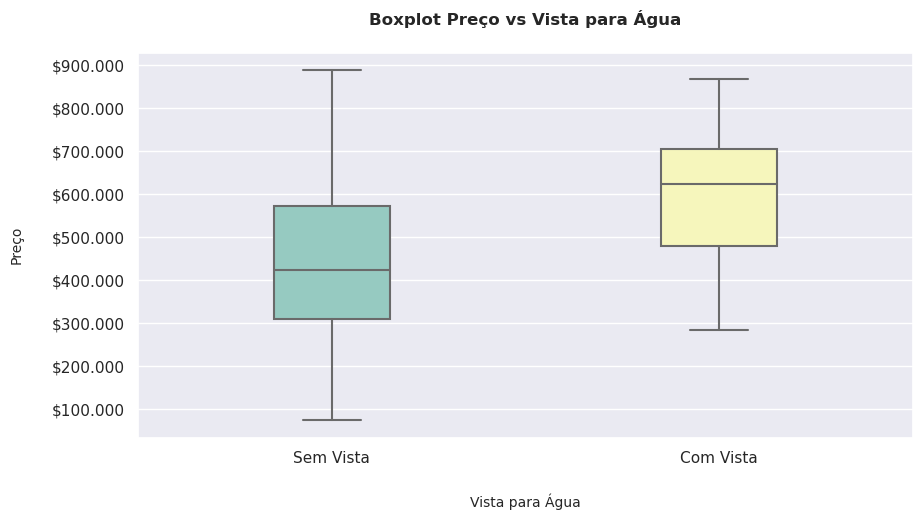

In [277]:
#Para melhor visualização estamos pegando apenas os preços menores que o valor do 90 percentil para remover os outliers 
df_filter = df[df['price'] <= df['price'].quantile(.9)]

#Criando Boxplot
plt.figure(figsize=(10, 5))
plt.title('Boxplot Preço vs Vista para Água', fontweight='bold', pad=20)
g = sns.boxplot(
    data=df_filter,
    x='waterfront',
    y='price',
    width=0.3
)

#Configurando X axis
labels = ['Sem Vista', 'Com Vista']
g.set_xticklabels(labels)
g.set_xlabel('Vista para Água', labelpad=20, fontsize=10)

#Configurando Y axis
g.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'${x:,.0f}'.replace(',', '.')))
g.set_ylabel('Preço', labelpad=20, fontsize=10);

In [278]:
df_group = df_filter[['waterfront', 'price']].groupby('waterfront').mean().reset_index()
preco_svista = float(df_group.query('waterfront == "no"')['price'])
preco_cvista = float(df_group.query('waterfront == "yes"')['price'])
print(f'O preço médio das casas de frente para a água é {((preco_cvista/preco_svista)-1)*100:.0f}% maior que os imóveis que não estão de frente')


O preço médio das casas de frente para a água é 32% maior que os imóveis que não estão de frente


**Observação**
* Em média, os imóveis com vista para a água tem um valor maior em comparação com aqueles que não tem vista para água
* Removendo os outliers, que alteram muito nossa média, temos que os imóveis de frente para a água são 32% mais caras que aquelas casas que não são

Com isso, confirmamos nossa hipótese apenas reajustando a estimativa: Imóveis de frente para a água são 32% mais caras

### **Hipótese 2**

Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

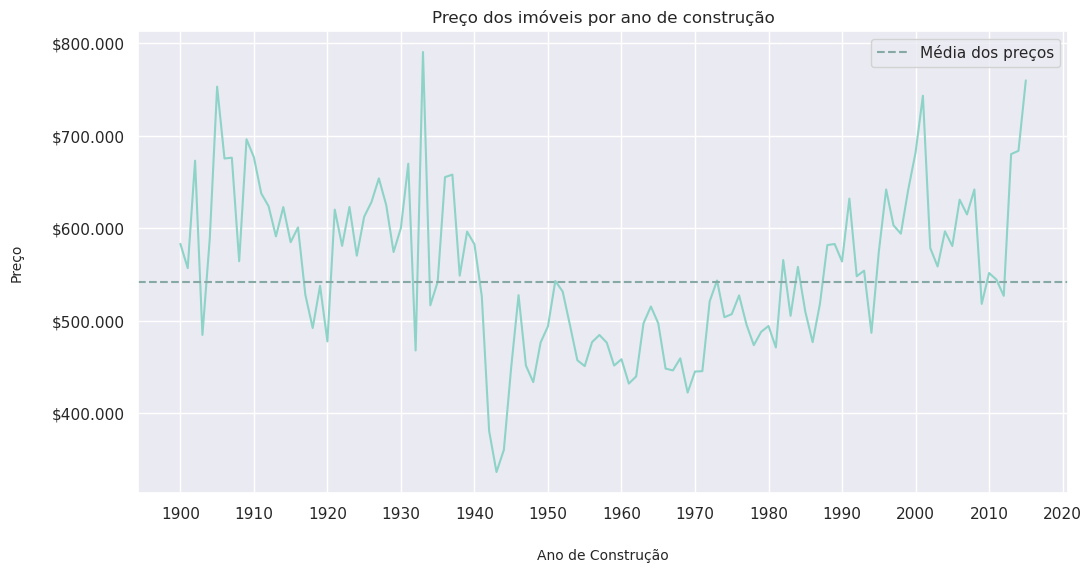

In [279]:
#Criando gráfico de linhas
plt.title('Preço dos imóveis por ano de construção')
g = sns.lineplot(
    data=df,
    x='yr_built',
    y='price',
    ci=None
)

#Configurando X axis
g.set_xlabel('Ano de Construção', labelpad=20, fontsize=10)

#Configurando Y axis
g.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'${x:,.0f}'.replace(',', '.')))
g.set_ylabel('Preço', labelpad=20, fontsize=10);

#Criando linha de média
handles = []
handles.append(g.axhline(df['price'].mean(), c='#87a9a5', linestyle="dashed"))
labels = ["Média dos preços"]
g.xaxis.set_major_locator(mtick.MultipleLocator(base=10))

#adicionando legenda
plt.legend(handles = handles, labels = labels);

In [280]:
preco_antes_1955 = float(df[df['yr_built'] <= 1955]['price'].mean())
preco_depois_1955 = float(df[df['yr_built'] > 1955]['price'].mean())
print(f'O preço médio dos imóveis construidos depois de 1955 é {((preco_depois_1955/preco_antes_1955)-1)*100:.0f}% maior que dos imóveis construidos depois de 1955')


O preço médio dos imóveis construidos depois de 1955 é 1% maior que dos imóveis construidos depois de 1955


É possível observar no gráfico que em uma determinada época de construção (1940 a 1980) o preço dos imóveis são menores que a média. Vamos observar o preço médio por ano de construção agrupado por decadas

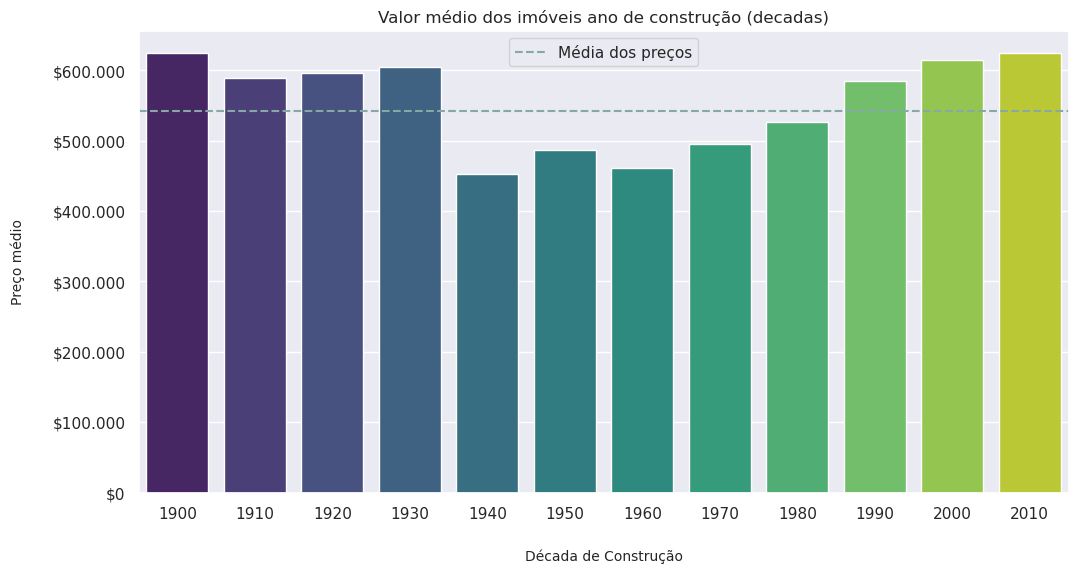

In [281]:
plt.title('Valor médio dos imóveis ano de construção (decadas)')

#Calculando o valor médio dos imóveis por ano de construção
df_mean_price = df[['yr_built', 'price']].groupby(['yr_built']).mean().reset_index()

#Criando os agrupamentos de ano de construção por décadas
df_mean_price['decade'] = pd.cut(df_mean_price['yr_built'], bins=[x+1 for x in range(1898, 2022, 10)], labels=[f'{x}' for x in range(1900, 2012, 10)])

#Criando o gráfico de barras
g = sns.barplot(
    data=df_mean_price,
    x='decade',
    y='price',
    palette='viridis',
    ci=None
)

#Configurando X axis
g.set_xlabel('Década de Construção', labelpad=20, fontsize=10)

#Configurando Y axis
g.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'${x:,.0f}'.replace(',', '.')))
g.set_ylabel('Preço médio', labelpad=20, fontsize=10);

handles = []
handles.append(g.axhline(df['price'].mean(), c='#87a9a5', linestyle="dashed"))
labels = ["Média dos preços"]

#adicionando legenda
plt.legend(handles = handles, labels = labels);


In [282]:
preco_entre_40_90 = float(df[(df['yr_built'] >= 1940) & (df['yr_built'] <= 1980)]['price'].mean())
preco_medio = float(df['price'].mean())
print(f'O preço médio dos imóveis construidos entre 1940 e 1980 é {((preco_medio/preco_entre_40_90-1)*100):.0f}% menor que a média geral dos imóveis')


O preço médio dos imóveis construidos entre 1940 e 1980 é 15% menor que a média geral dos imóveis


**Observação**
* Observando o gráfico que mostra o preço dos imóveis por ano de construção percebemos que os imóveis que foram construidos entre 1940 e quase 1990 custam no geral menos que a média.
    * Ao verificar, percebemos que esses imóveis custam 12% menos que a média dos imóveis
* Quando calculamos a média dos imóveis construídos antes de 1955 e depois temos uma diferença baixa, de apenas 2%

Com isso, refutamos a nossa hipótese inicial: Imóveis construídos antes de 1955 são apenas 2% mais baratos, porém vimos que imóveis construidos entre 1940 e 1980 são 15% mais baratos

### **Hipótese 3**

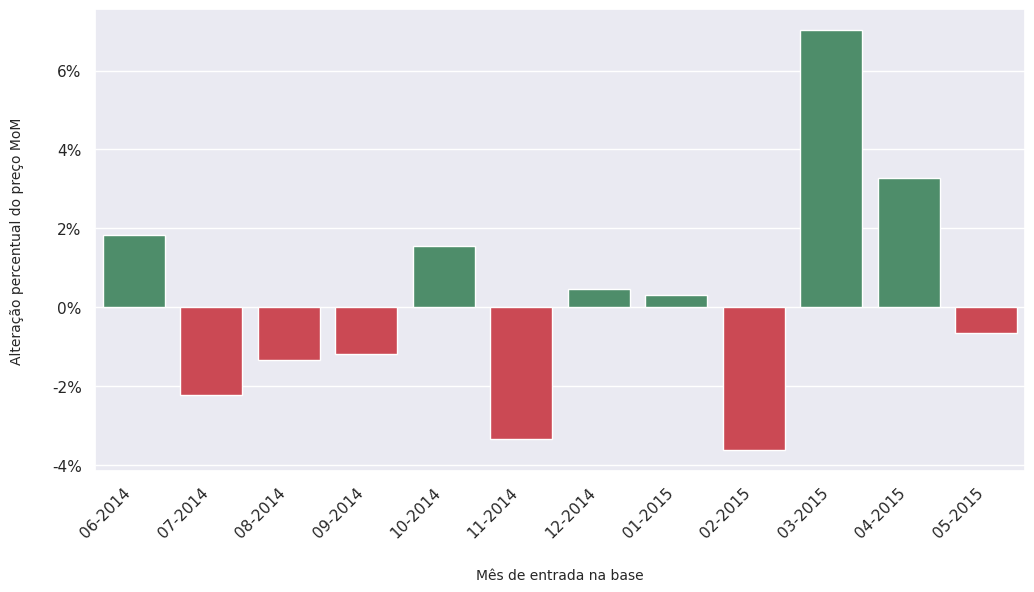

In [283]:
df_mom = df[['date', 'price']].copy()

df_mom["date"] = pd.to_datetime(df_mom["date"].dt.strftime('%m/%Y'))

df_mom = df_mom.groupby('date').mean().reset_index()
df_mom['percent_diff'] = df_mom['price'].pct_change(1)

#Criando o gráfico de barras
clrs = ['#449769' if (x > 0) else '#e13342' for x in df_mom.iloc[1:,:]['percent_diff'] ]
g = sns.barplot(
    data=df_mom.iloc[1:,:],
    x='date',
    y='percent_diff',
    palette=clrs
)


x_dates = df_mom.iloc[1:,:]['date'].dt.strftime('%m-%Y')
g.set_xticklabels(labels=x_dates, rotation=45, ha='right')
_ = plt.xticks(rotation=45)  

# #Configurando X axis
g.set_xlabel('Mês de entrada na base', labelpad=20, fontsize=10)

# #Configurando Y axis
g.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: f'{x*100:.0f}%'.replace(',', '.')))
g.set_ylabel('Alteração percentual do preço MoM', labelpad=20, fontsize=10);


**Observação**
* Observando o gráfico que mostra a alteração percentual do valor dos imóveis mês a mês vemos que não existe um padrão claro

Com isso, refutamos a nossa hipótese inicial: Há sempre um crescimento do preço dos imóveis MoM (Month over Month) de 10%. Não existe esse movimento

### **Hipótese 4**

Imóveis reformados são 10% mais caros, na média

In [284]:
preco_reformado = float(df[(df['yr_renovated'] > 0)]['price'].mean())
preco_nao_reformado = float(df[(df['yr_renovated'] <= 0)]['price'].mean())
print(f'O preço médio dos imóveis reformados é $ {preco_reformado:.2f} e dos não reformados é $ {preco_nao_reformado:.2f}.')
print(f'Imóveis reformados são {((preco_reformado-preco_nao_reformado)/preco_nao_reformado)*100:.2f}% mais caros que os não reformados')

O preço médio dos imóveis reformados é $ 762118.06 e dos não reformados é $ 531875.73.
Imóveis reformados são 43.29% mais caros que os não reformados


**Observação**

Quando calculamos a média de preço dos imóveis reformados em algum momento com preço dos não reformados encontramos um valor 43% maior nos reformados.

Com isso, refutamos em parte nossa hipótese inicial: Imóveis reformados não são 10% mais caros são na verdade 43% mais caros, na média

### **Hipótese 5**

Apartamentos com uma vista excelente são 30% mais caros, na média

In [285]:
preco_view_excelent = float(df[(df['view'] == 'excelent')]['price'].mean())
preco_view_not_excelent = float(df[(df['view'] != 'excelent')]['price'].mean())
print(f'O preço médio dos imóveis com vista excelente é $ {preco_view_excelent:.2f} e dos com vista inferior é $ {preco_view_not_excelent:.2f}.')
print(f'Imóveis com vista excelente são {((preco_view_excelent-preco_view_not_excelent)/preco_view_not_excelent)*100:.2f}% mais caros que os com vistas inferiores')

O preço médio dos imóveis com vista excelente é $ 1465750.90 e dos com vista inferior é $ 527823.45.
Imóveis com vista excelente são 177.70% mais caros que os com vistas inferiores


**Observação**

Quando calculamos a média de preço dos imóveis com vista excelente com preço dos com vista inferior (não excelente) encontramos um valor 178% maior.

Com isso, refutamos em parte nossa hipótese inicial: Imóveis com vista excelente não são 30% mais caros, são na verdade 178% mais caros, na média

### **Hipótese 6**

Quanto mais pro passado olhamos em relação a data de construção maior a proporção de imóveis reformados

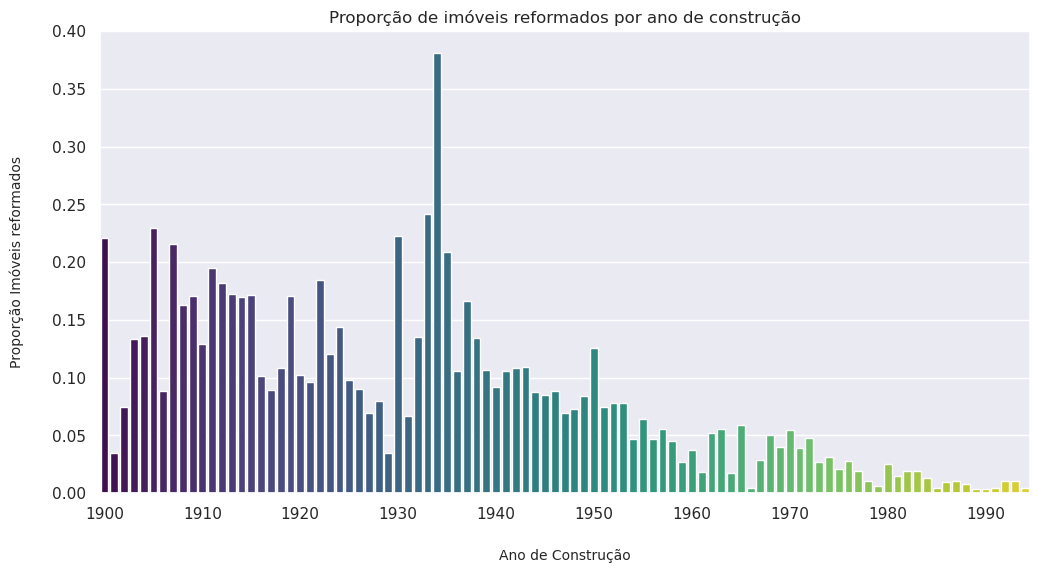

In [286]:
plt.title('Proporção de imóveis reformados por ano de construção')

#Contando número de imóveis reformados e de total de imóveis por ano de construção
df_count_renovated = df.loc[df['yr_renovated'] > 0, ['yr_built', 'id']].groupby(['yr_built']).count().reset_index()
df_count = df[['yr_built', 'id']].groupby(['yr_built']).count().reset_index()

#Descobrindo a proporção de imóveis reformados por ano de construção
df_count_renovated['id'] = df_count_renovated['id']/df_count['id']

#Criando o gráfico de barras
g = sns.barplot(
    data=df_count_renovated,
    x='yr_built',
    y='id',
    palette='viridis'
)
g.xaxis.set_major_locator(mtick.MultipleLocator(base=10))

#Configurando X axis
g.set_xlabel('Ano de Construção', labelpad=20, fontsize=10)

#Configurando Y axis
g.set_ylabel('Proporção Imóveis reformados', labelpad=20, fontsize=10);

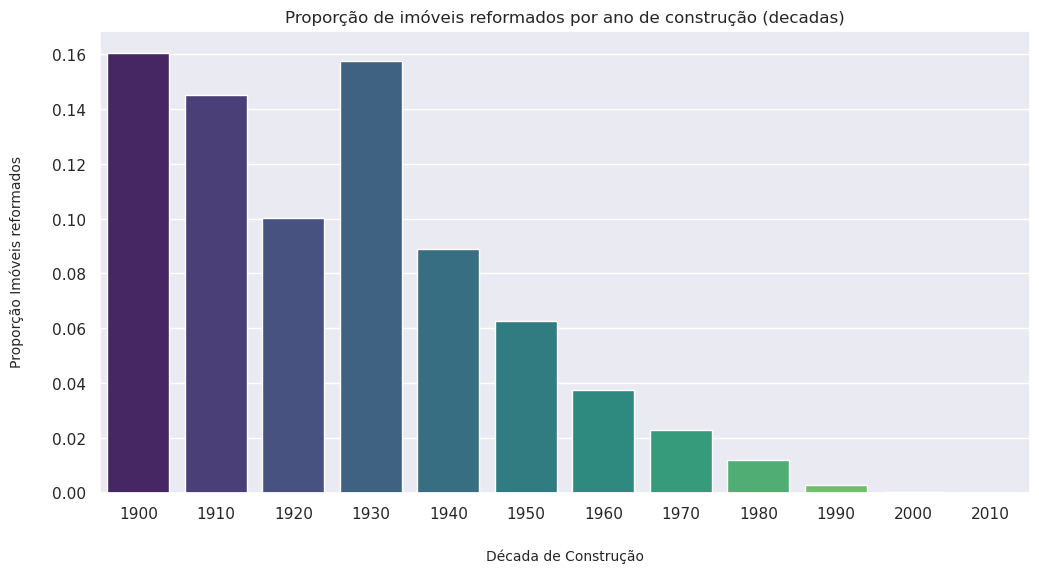

In [287]:
plt.title('Proporção de imóveis reformados por ano de construção (decadas)')

#Contando número de imóveis total por ano de construção e número de imóveis reformados por ano de construção
df_count_yr = df[['yr_built', 'id']].groupby(['yr_built']).count().reset_index().rename(columns={'id': 'count'})
df_count_renovated = df.loc[df['yr_renovated'] > 0, ['yr_built', 'id']].groupby(['yr_built']).count().reset_index().rename(columns={'id': 'renovated'})

#Unindo os dataframes
df_count = pd.merge(df_count_yr, df_count_renovated, on='yr_built', how='left').fillna(0)
df_count['renovated'] = df_count['renovated'].astype(int)

#Criando os agrupamentos de ano de construção por décadas
df_count['decade'] = pd.cut(df_count['yr_built'], bins=[x+1 for x in range(1898, 2022, 10)], labels=[f'{x}' for x in range(1900, 2012, 10)])

#Calculando a proporção de imóveis reformados por decada
df_count_group = df_count[['decade', 'renovated', 'count']].groupby('decade').sum().reset_index()
df_count_group['percent_renovated'] = df_count_group['renovated']/df_count_group['count']

#Criando o gráfico de barras
g = sns.barplot(
    data=df_count_group,
    x='decade',
    y='percent_renovated',
    palette='viridis'
)

#Configurando X axis
g.set_xlabel('Década de Construção', labelpad=20, fontsize=10)

#Configurando Y axis
g.set_ylabel('Proporção Imóveis reformados', labelpad=20, fontsize=10);


**Observação**
* Há um aumento abrupto na proporção de imóveis reformados e que foram construídos na decada de 30 (1930 à 1939). Cerca de 16% dos imóveis construídos nessa época foram reformados em algum momento.
* Confirmamos o imaginado de que: menos casas são reformadas conforme o ano de construção se torna mais recente.



## 6. Perguntas de Negócio

Temos duas grandes questões de negócio:


1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

2. Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço?

### 6.1 Imóveis que a H.S deveria comprar (Pergunta 1)

Vamos agrupar os imóveis por Zipcode e pegar a mediana por região

In [288]:
#Agrupando anuncios por região
df_group_zipcode = df[['id', 'price', 'zipcode']].groupby('zipcode')

# Descobrindo a Mediana do preço por região
df_price_median = df_group_zipcode.median().reset_index()
df_price_median.rename(columns={'price': 'price_region'}, inplace=True)

# Descobrindo a quantidade de anúncios por região
df_count_region = df_group_zipcode.count().reset_index()
df_count_region.rename(columns={'id': 'n_region'}, inplace=True)


In [289]:
#Analisando a quantidade de anúncios por região
df_count_region['n_region'].describe().T.to_frame()

n_region
count     70.00
mean     306.23
std      141.07
min       49.00
25%      202.50
50%      281.50
75%      403.75
max      600.00

In [290]:
#Adicionando informação de preço mediano no Dataframe resposta
df_answer_buy = pd.merge(df[['id', 'price', 'lat', 'long', 'zipcode', 'condition']], df_price_median[['price_region', 'zipcode']], on='zipcode', how='left')

In [291]:
#Adicionando informação de densidade de imóveis por região no Dataframe resposta
df_answer_buy = pd.merge(df_answer_buy, df_count_region[['n_region', 'zipcode']], on='zipcode', how='left')

In [292]:
df_answer_buy.head()

id      price   lat    long  zipcode condition  price_region  n_region
0  5561000190 437,500.00 47.46 -121.99    98027      good    571,000.00       411
1   472000620 790,000.00 47.68 -122.40    98117      good    545,000.00       548
2  1024069009 675,000.00 47.58 -122.03    98029   average    574,500.00       320
3  7853361370 555,000.00 47.52 -121.87    98065   average    500,000.00       307
4  5056500260 440,000.00 47.54 -122.18    98006   average    760,184.50       490

Iremos sugerir a compra dos imóveis que estejam abaixo do valor mediano da região e estejam em boas condições (good ou very good)

In [293]:
#Criando variável com recomendação de compra
df_answer_buy['buy'] = 'no'

#definindo critério de compra
buy_if = (df_answer_buy['price'] < df_answer_buy['price_region']) &\
        (df_answer_buy['condition'].cat.codes >= 4)

#filtrando imóveis a serem comprados
df_answer_buy.loc[buy_if, 'buy'] = 'yes'
df_answer_buy['buy'] = df_answer_buy['buy'].astype("category")


Iremos sugerir um valor de compra com base no número de imóveis sendo vendidos na região

In [294]:
#Criando variável com sugestão de oferta para compra
df_answer_buy['offer_suggest'] = 0

#função que retorna o valor médio com base no Zipcode e Estação do ano
def define_offer_sugest(x):
    return  x['price']          if x['n_region'] <= 204 else \
            x['price']*0.98     if (x['n_region'] >= 205) & (x['n_region'] <= 282) else \
            x['price']*0.97     if (x['n_region'] >= 283) & (x['n_region'] <= 409) else \
            x['price']*0.95

#Criando variavel com o valor médio da região e estação do ano
df_answer_buy['offer_suggest'] = df_answer_buy[['price', 'n_region']].apply(define_offer_sugest, axis=1)

In [295]:
df_answer_buy.head()

id      price   lat    long  zipcode condition  price_region  n_region buy  offer_suggest
0  5561000190 437,500.00 47.46 -121.99    98027      good    571,000.00       411  no     415,625.00
1   472000620 790,000.00 47.68 -122.40    98117      good    545,000.00       548  no     750,500.00
2  1024069009 675,000.00 47.58 -122.03    98029   average    574,500.00       320  no     654,750.00
3  7853361370 555,000.00 47.52 -121.87    98065   average    500,000.00       307  no     538,350.00
4  5056500260 440,000.00 47.54 -122.18    98006   average    760,184.50       490  no     418,000.00

In [296]:
n_buy_yes = df_answer_buy[df_answer_buy['buy'] == 'yes'].shape[0]
n_buy_total = df_answer_buy.shape[0]
print(f'Há {n_buy_yes} ({round((n_buy_yes/n_buy_total)*100,2)}%) imóveis que podem ser comprados')

buy_price_median = df_answer_buy.loc[df_answer_buy['buy'] == 'yes', 'price'].median()
buy_offer_median = df_answer_buy.loc[df_answer_buy['buy'] == 'yes', 'offer_suggest'].median()
print(f'O valor mediano anunciado é de $ {buy_price_median:.2f} e o valor mediano de oferta sugerida é {buy_offer_median:.2f} ({round(((buy_price_median-buy_offer_median)/buy_price_median)*100,2)}% menor)')


Há 698 (3.26%) imóveis que podem ser comprados
O valor mediano anunciado é de $ 343000.00 e o valor mediano de oferta sugerida é 332452.50 (3.08% menor)


Vamos verificar no Mapa onde estão localizados os imóveis

In [297]:
aux = df_answer_buy[['lat', 'long', 'price', 'buy']].copy()

fig = px.scatter_mapbox( aux, 
                         lat="lat", 
                         lon="long", 
                         color='buy',
                         color_discrete_sequence = ['rgba(150,150,150,.4)', 'rgba(82,132,204,1)'],
                         labels={'buy': 'Buy?'},
                         zoom=11)

fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(marker={'size': 10})
fig.update_layout(height=800, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### 6.2 Quando e por qual valor a H.S deveria vender (Pergunta 2)

Vamos agrupar os imóveis por região e por estação do Ano. Com isso conseguimos tirar o preço médio do imóvel levando em consideração a região e o valor de compra/venda do imóvel em determinada estação do ano.

In [298]:
# Descobrindo a Mediana do preço por região e sazonalidade
df_group_zipcode_season = df[['id', 'price', 'zipcode', 'date']].copy()
df_group_zipcode_season['month'] = df_group_zipcode_season['date'].dt.month

#Definindo a estação do ano em que o imóvel foi adicionado na base
df_group_zipcode_season['season'] = df_group_zipcode_season['month'].apply(lambda x:    'Winter' if x in [12, 1, 2] else
                                                                                        'Spring' if x in [3, 4, 5] else
                                                                                        'Summer' if x in [6, 7, 8] else 'Fall')

#criando a tabela com os preços médios por região e estação do ano
df_group_zipcode_season = df_group_zipcode_season[['zipcode', 'season', 'price']].groupby(['zipcode', 'season']).mean().reset_index()
df_group_zipcode_season.rename(columns={'price': 'price_region'}, inplace=True)

In [299]:
#Verificando preço médio por estação do Ano
df_group_zipcode_season.groupby('season')['price_region'].mean().to_frame()

price_region
season              
Fall      555,760.70
Spring    571,337.87
Summer    561,763.46
Winter    549,046.60

Os imóveis anunciados na primavera tem o preço médio maior e os anunciados no inverno tem o preço medio menor

In [300]:
#Criando Dataframe resposta
df_answer_sell = df[['id', 'price', 'lat', 'long', 'zipcode', 'date']].copy()
df_answer_sell['month'] = df_answer_sell['date'].dt.month

#Definindo a estação do ano em que o imóvel foi adicionado na base
df_answer_sell['season'] = df_answer_sell['month'].apply(lambda x:  'Winter' if x in [12, 1, 2] else
                                                                    'Spring' if x in [3, 4, 5] else
                                                                    'Summer' if x in [6, 7, 8] else 'Fall')

#Removendo variável month e date usados para definir estação do ano
df_answer_sell.drop(columns=['month', 'date'], inplace=True)


In [301]:
#Adicionando preço mediano por região e estação do ano
df_answer_sell = pd.merge(df_answer_sell, df_group_zipcode_season, on=['zipcode', 'season'], how='left')

In [302]:
#Adicionando informação de densidade de imóveis por região no Dataframe resposta
df_answer_sell = pd.merge(df_answer_sell, df_count_region[['n_region', 'zipcode']], on='zipcode', how='left')

Com base no valor médio de compra/venda do imóvel para determinada região e estação do ano iremos:

* Se o preço anunciado for maior que o preço mediano dos imóveis naquela região e na mesma estação do ano:
    * Imóveis em região com até 204 anúncios -> Valor de venda 3% maior que o anunciado
    * Imóveis em região com 205 a 282 anúncios -> Valor de venda 2% maior que o anunciado
    * Imóveis em região com 283 a 409 anúncios -> Valor de venda 1% maior que o anunciado
    * Imóveis em região com 410 ou mais anúncios -> Valor de venda 0,5% maior que o anunciado
    
* Se o preço anunciado for menor que o preço mediano dos imóveis naquela região e na mesma estação do ano:
    * Imóveis em região com até 204 anúncios -> Valor de venda 30% maior que o anunciado
    * Imóveis em região com 205 a 282 anúncios -> Valor de venda 20% maior que o anunciado
    * Imóveis em região com 283 a 409 anúncios -> Valor de venda 15% maior que o anunciado
    * Imóveis em região com 410 ou mais anúncios -> Valor de venda 10% maior que o anunciado


In [303]:
df_answer_sell['sell_suggest'] = 0

#função que retorna o valor médio com base no Zipcode e Estação do ano
def define_sell_suggest(x):
    sell_suggest = 0
    if x['price'] >= x['price_region']:
        sell_suggest =  x['price']*1.03     if x['n_region'] <= 204 else \
                        x['price']*1.02     if (x['n_region'] >= 205) & (x['n_region'] <= 282) else \
                        x['price']*1.01     if (x['n_region'] >= 283) & (x['n_region'] <= 409) else \
                        x['price']*1.005
    else:
        sell_suggest =  x['price']*1.30     if x['n_region'] <= 204 else \
                        x['price']*1.20     if (x['n_region'] >= 205) & (x['n_region'] <= 282) else \
                        x['price']*1.15     if (x['n_region'] >= 283) & (x['n_region'] <= 409) else \
                        x['price']*1.10    
    return sell_suggest

#Definindo o valor de venda com base no valor de compra e o valor médio da região + estação do ano
df_answer_sell['sell_suggest'] = df_answer_sell[['price_region', 'price', 'n_region']].apply(define_sell_suggest, axis=1)

In [304]:
#Adicionando informação de compra do imóvel e filtrar para apenas os imóveis que foram comprados
df_answer_sell = pd.merge(df_answer_sell, df_answer_buy[['id', 'buy', 'offer_suggest']], on='id', how='left')
df_answer_sell = df_answer_sell[df_answer_sell['buy'] == 'yes']

In [305]:
#Criando variável com o valor de lucro caso a venda seja feita pelo preço sugerido
df_answer_sell['profit'] = df_answer_sell['sell_suggest'] - df_answer_sell['offer_suggest']

Vamos visualizar no mapa o lucro esperado por imóvel, caso sejam comprados pelo valor e vendidos na época do ano estipulada

In [307]:
aux = df_answer_sell[['lat', 'long', 'profit']].copy()

fig = px.scatter_mapbox( aux, 
                         lat="lat", 
                         lon="long", 
                         color='profit', 
                         zoom=11)

fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(marker={'size': 10})
fig.update_layout(height=800, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## 7. Conclusão

In [308]:
profit_total = df_answer_sell['profit'].sum()
print(f'O valor total de lucro esperado é de $ {profit_total:.2f}')


O valor total de lucro esperado é de $ 51127706.84


Caso a House Rocket compre todas as casas indicadas e consiga vender pelos preços sugeridos ela terá um lucro de \$ 51.127.706,84